In [12]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# @Date    : Nov-12-20 15:50
# @Author  : Kelly Hwong (dianhuangkan@gmail.com)
# @RefLink : https://keras.io/api/applications/

In [22]:
import tensorflow as tf
# from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# from tensorflow.keras.applications.applications_load_weight_test import _get_elephant # for tensorflow>=2.3.x
# @RefLink : https://github.com/tensorflow/tensorflow/blob/a1ce93056333b296d02601870fa3bc89e16d6de9/tensorflow/python/keras/applications/applications_load_weight_test.py#L81
from tensorflow.python.keras.utils import data_utils

def _get_elephant(target_size):
  # For models that don't include a Flatten step,
  # the default is to accept variable-size inputs
  # even when loading ImageNet weights (since it is possible).
  # In this case, default to 299x299.
  if target_size[0] is None:
    target_size = (299, 299)
  test_image = data_utils.get_file('elephant.jpg', TEST_IMAGE_PATH)
  img = image.load_img(test_image, target_size=tuple(target_size))
  x = image.img_to_array(img)
  return np.expand_dims(x, axis=0)

In [4]:
TEST_IMAGE_PATH = ('https://storage.googleapis.com/tensorflow/'
                   'keras-applications/tests/elephant.jpg')
img_path = data_utils.get_file('elephant.jpg', TEST_IMAGE_PATH)
print(img_path)

C:\Users\kellyhwong\.keras\datasets\elephant.jpg


In [5]:
img = _get_elephant(target_size=(299, 299))

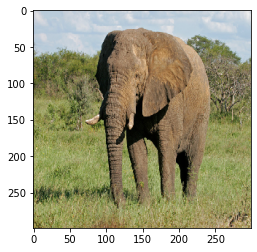

In [6]:
plt.imshow(img[0].astype(int))

In [23]:
input_ = tf.keras.layers.Input([None, None, 3], dtype = tf.uint8)
x = tf.cast(input_, tf.float32)
x = preprocess_input(x)
core = ResNet50V2(weights='imagenet')
x = core(x)
model = tf.keras.Model(inputs=[input_], outputs=[x])



In [24]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
tf_op_layer_Cast (TensorFlow [(None, None, None, 3)]   0         
_________________________________________________________________
tf_op_layer_strided_slice (T [(None, None, None, 3)]   0         
_________________________________________________________________
tf_op_layer_BiasAdd (TensorF [(None, None, None, 3)]   0         
_________________________________________________________________
resnet50v2 (Model)           (None, 1000)              25613800  
Total params: 25,613,800
Trainable params: 25,568,360
Non-trainable params: 45,440
_________________________________________________________________


In [7]:
image = tf.image.decode_png(tf.io.read_file('file.png'))
result = model(image)

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

Predicted: [('n02504458', 'African_elephant', 0.80182546), ('n01871265', 'tusker', 0.18549316), ('n02504013', 'Indian_elephant', 0.012507762)]


In [8]:
preds.shape

(1, 1000)

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array([7.2679709e-12, 8.0182545e-02, 1.6036509e-01, 2.4054764e-01,
        3.2073018e-01, 4.0091273e-01, 4.8109528e-01, 5.6127781e-01,
        6.4146036e-01, 7.2164291e-01, 8.0182546e-01], dtype=float32),
 <a list of 1000 Lists of Patches objects>)

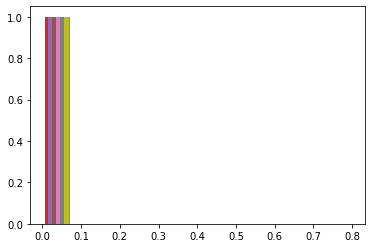

In [9]:
hist, bin_edges = np.histogram(preds)
plt.hist(preds, bin_edges)

In [11]:
print(hist)
print(bin_edges)

[998   0   1   0   0   0   0   0   0   1]
[7.2679709e-12 8.0182545e-02 1.6036509e-01 2.4054764e-01 3.2073018e-01
 4.0091273e-01 4.8109528e-01 5.6127781e-01 6.4146036e-01 7.2164291e-01
 8.0182546e-01]
